In [293]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
%matplotlib inline

In [294]:
A = np.array(
    [
        [10, 6, 12],
        [11, 4, 9],
        [8, 5, 10],
        [3, 3, 2.5],
        [2, 2.8, 1.3],
        [1, 1, 2]
    ]
)

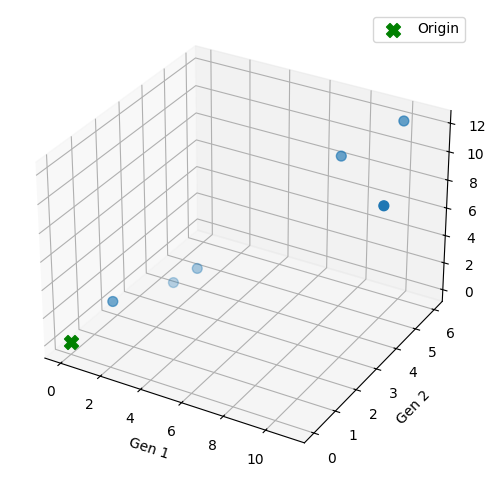

In [295]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(A[:, 0], A[:, 1], A[:, 2], s=50)
# Add origin marker
ax.scatter(0, 0, 0, color='green', label='Origin', s=100, marker='X')
# Labels and legend
ax.set_xlabel('Gen 1')
ax.set_ylabel('Gen 2')
ax.set_zlabel('Gen 3')
ax.legend()
plt.show()

In [296]:
# center data (subtract mean)
mean = np.mean(A, axis=0).reshape(1,3)
A_centr = A - mean
A_centr

array([[ 4.16666667,  2.36666667,  5.86666667],
       [ 5.16666667,  0.36666667,  2.86666667],
       [ 2.16666667,  1.36666667,  3.86666667],
       [-2.83333333, -0.63333333, -3.63333333],
       [-3.83333333, -0.83333333, -4.83333333],
       [-4.83333333, -2.63333333, -4.13333333]])

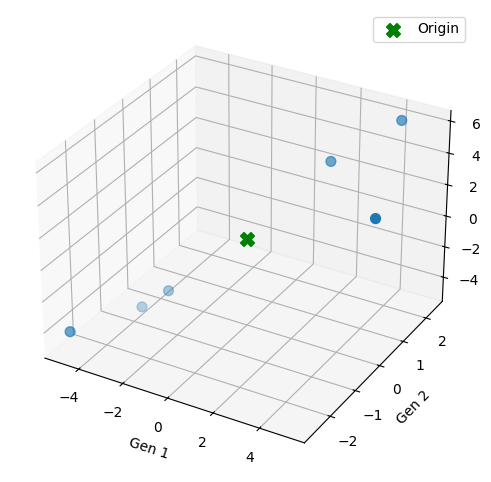

In [297]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(A_centr[:, 0], A_centr[:, 1], A_centr[:, 2], s=50)
# Add origin marker
ax.scatter(0, 0, 0, color='green', label='Origin', s=100, marker='X')
# Labels and legend
ax.set_xlabel('Gen 1')
ax.set_ylabel('Gen 2')
ax.set_zlabel('Gen 3')
ax.legend()
plt.show()

In [298]:
def pca(A: np.array):
    scaler = StandardScaler()
    A = scaler.fit_transform(A)

    # svd
    U, S, V_T = np.linalg.svd(A)
    # sigma = np.diag(np.hstack((S, np.zeros((3,)))))
    V = V_T.T
    X = A @ V
    # B = U @ sigma
    total_variance = np.sum(S ** 2)
    variance = [S[i] ** 2 / total_variance for i in range(len(S))]
    return X, variance

def normalize_data(X):
    # Normalize data to the range [0, 1]
    scaler = MinMaxScaler()
    X_normalized = scaler.fit_transform(X)
    return X_normalized

In [299]:
X, variance = pca(A)
print(X[:,:1])
print(variance[:1])
print(np.sum(variance[:1]))

[[-2.23721935]
 [-1.26961933]
 [-1.32259487]
 [ 1.12967643]
 [ 1.50886918]
 [ 2.19088794]]
[0.9288436573201706]
0.9288436573201706


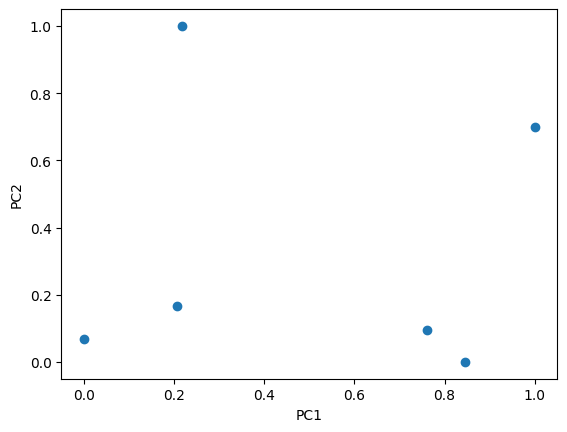

In [300]:
X_norm = normalize_data(X)
plt.scatter(X_norm[:, 0], X_norm[:, 1])
#plt.scatter(X_norm[:, 0], np.zeros_like(X_norm[:, 1]))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [301]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target
data['target_name'] = data['target'].apply(lambda x: iris.target_names[x])


# Standardize using StandardScaler
features = data.drop(columns=['target', 'target_name'])
standard_scaler = StandardScaler()
features_stand = standard_scaler.fit_transform(features)
data_stand = pd.DataFrame(features_stand, columns=features.columns)
data_stand['target'] = data['target']
data_stand['target_name'] = data['target_name']
data_stand

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,-0.900681,1.019004,-1.340227,-1.315444,0,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,0,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,0,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,0,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,0,setosa
...,...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,2,virginica
146,0.553333,-1.282963,0.705921,0.922303,2,virginica
147,0.795669,-0.131979,0.819596,1.053935,2,virginica
148,0.432165,0.788808,0.933271,1.448832,2,virginica


In [302]:
data_arr = np.array(data.iloc[:, :-2])
data_arr

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [303]:
X, variance = pca(data_arr)
print(X[:,:2])
print(variance[:2])
print(np.sum(variance[:2]))

[[-2.26470281 -0.4800266 ]
 [-2.08096115  0.67413356]
 [-2.36422905  0.34190802]
 [-2.29938422  0.59739451]
 [-2.38984217 -0.64683538]
 [-2.07563095 -1.48917752]
 [-2.44402884 -0.0476442 ]
 [-2.23284716 -0.22314807]
 [-2.33464048  1.11532768]
 [-2.18432817  0.46901356]
 [-2.1663101  -1.04369065]
 [-2.32613087 -0.13307834]
 [-2.2184509   0.72867617]
 [-2.6331007   0.96150673]
 [-2.1987406  -1.86005711]
 [-2.26221453 -2.68628449]
 [-2.2075877  -1.48360936]
 [-2.19034951 -0.48883832]
 [-1.898572   -1.40501879]
 [-2.34336905 -1.12784938]
 [-1.914323   -0.40885571]
 [-2.20701284 -0.92412143]
 [-2.7743447  -0.45834367]
 [-1.81866953 -0.08555853]
 [-2.22716331 -0.13725446]
 [-1.95184633  0.62561859]
 [-2.05115137 -0.24216355]
 [-2.16857717 -0.52714953]
 [-2.13956345 -0.31321781]
 [-2.26526149  0.3377319 ]
 [-2.14012214  0.50454069]
 [-1.83159477 -0.42369507]
 [-2.61494794 -1.79357586]
 [-2.44617739 -2.15072788]
 [-2.10997488  0.46020184]
 [-2.2078089   0.2061074 ]
 [-2.04514621 -0.66155811]
 

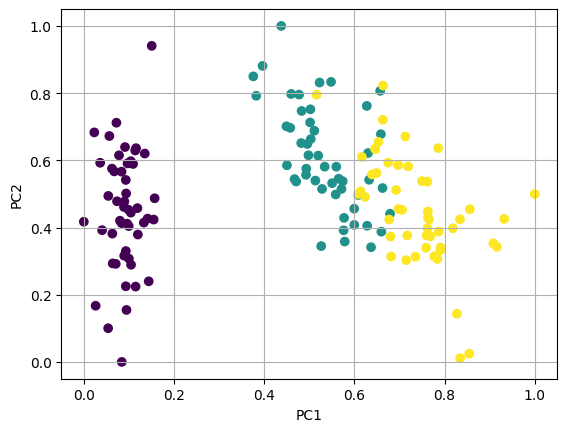

In [304]:
X_norm = normalize_data(X[:, :2])

plt.scatter(X_norm[:, 0], X_norm[:, 1], c=data['target'], cmap='viridis')
plt.grid()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()  